# Text Classification using LSTM

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [69]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM,Input,GlobalMaxPool1D,Embedding,GlobalMaxPooling1D
from sklearn.metrics import classification_report,roc_auc_score

### Importing Data

In [35]:
df=pd.read_csv('spam.csv')

In [36]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [38]:
df.isna().sum()

Category    0
Message     0
dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

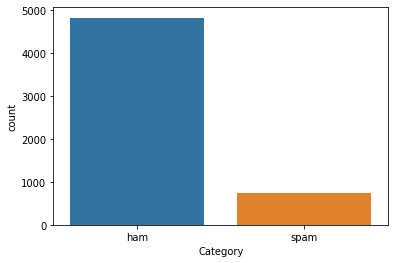

In [39]:
sns.countplot(df['Category'])

In [40]:
df['Category']=df['Category'].map({'ham':1,'spam':0})

In [41]:
df['Category'].unique()

array([1, 0], dtype=int64)

In [42]:
from sklearn.model_selection import train_test_split
X=df['Message']
y=df['Category']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Text Processing

### Tokenization

In [44]:
tokenizer=Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_train)
X_train=tokenizer.texts_to_sequences(X_train)
X_test=tokenizer.texts_to_sequences(X_test)

In [45]:
word_to_index=tokenizer.word_index
print(len(word_to_index))

7500


### Padding

In [46]:
X_train=pad_sequences(X_train)

T=X_train.shape
T=T[1]

In [47]:
X_test=pad_sequences(X_test,maxlen=T)
X_test.shape

(1672, 189)

In [83]:
# ** Embeddindg Dimentionality **

D=20

# Its an hyper aparameter ( Length of word in sentence want to select)

# Hidden state dimentionality (M)

M=15

# Size of embedding should be (V+1 x D )
# Because first index start from 1 not from 0
# So if final index of embedding metrix is V then it should be V+1

V=len(word_to_index)


model=Sequential()
model.add(Input(shape=(T,)))
model.add(Embedding(V+1,D))
model.add(LSTM(M))
model.add(Dense(1,activation='softmax'))

In [49]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [50]:
early_stop=EarlyStopping(monitor='val_accuracy',patience=3)
reduceLR=ReduceLROnPlateau(monitor='val_accuarcy',patience=2)

In [85]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=(X_test,y_test),
            epochs=50,batch_size=64,callbacks=[early_stop])

Epoch 1/50
61/61 [==============================] - 9s 104ms/step - loss: 0.0000e+00 - accuracy: 0.8659 - val_loss: 0.0000e+00 - val_accuracy: 0.8660
Epoch 2/50
61/61 [==============================] - 6s 93ms/step - loss: 0.0000e+00 - accuracy: 0.8659 - val_loss: 0.0000e+00 - val_accuracy: 0.8660
Epoch 3/50
61/61 [==============================] - 6s 95ms/step - loss: 0.0000e+00 - accuracy: 0.8659 - val_loss: 0.0000e+00 - val_accuracy: 0.8660
Epoch 4/50
61/61 [==============================] - 6s 91ms/step - loss: 0.0000e+00 - accuracy: 0.8659 - val_loss: 0.0000e+00 - val_accuracy: 0.8660


<AxesSubplot:>

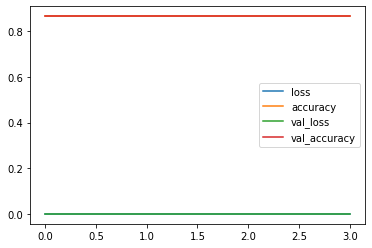

In [86]:
data_feame=pd.DataFrame(model.history.history)
data_feame.plot()

In [88]:
print(roc_auc_score(y_test,model.predict(X_test)))

print('\n')
print(classification_report(y_test,model.predict(X_test)))

53/53 [==============================] - 1s 22ms/step
0.5


53/53 [==============================] - 1s 22ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       224
           1       0.87      1.00      0.93      1448

    accuracy                           0.87      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.87      0.80      1672



In [89]:
# ** Embeddindg Dimentionality **

D=20

# Its an hyper aparameter ( Length of word in sentence want to select)

# Hidden state dimentionality (M)

M=15

# Size of embedding should be (V+1 x D )
# Because first index start from 1 not from 0
# So if final index of embedding metrix is V then it should be V+1

V=len(word_to_index)


model=Sequential()
model.add(Input(shape=(T,)))
model.add(Embedding(V+1,D))
model.add(LSTM(M,return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dense(1,activation='softmax'))

In [90]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=(X_test,y_test),
            epochs=50,batch_size=64,callbacks=[reduceLR,early_stop])

Epoch 1/50
61/61 [==============================] - 10s 110ms/step - loss: 0.0000e+00 - accuracy: 0.8659 - val_loss: 0.0000e+00 - val_accuracy: 0.8660 - lr: 0.0010
Epoch 2/50
61/61 [==============================] - 6s 96ms/step - loss: 0.0000e+00 - accuracy: 0.8659 - val_loss: 0.0000e+00 - val_accuracy: 0.8660 - lr: 0.0010
Epoch 3/50
61/61 [==============================] - 6s 97ms/step - loss: 0.0000e+00 - accuracy: 0.8659 - val_loss: 0.0000e+00 - val_accuracy: 0.8660 - lr: 0.0010
Epoch 4/50
61/61 [==============================] - 6s 94ms/step - loss: 0.0000e+00 - accuracy: 0.8659 - val_loss: 0.0000e+00 - val_accuracy: 0.8660 - lr: 0.0010


<AxesSubplot:>

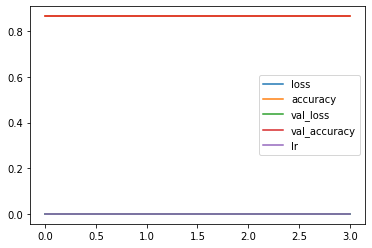

In [91]:
data_feame=pd.DataFrame(model.history.history)
data_feame.plot()

In [92]:
print(roc_auc_score(y_test,model.predict(X_test)))

print('\n')
print(classification_report(y_test,model.predict(X_test)))

53/53 [==============================] - 2s 24ms/step
0.5


53/53 [==============================] - 1s 22ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       224
           1       0.87      1.00      0.93      1448

    accuracy                           0.87      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.87      0.80      1672

